#SELECCION Y ETIQUETADO DE LA DATA

In [287]:
import pandas as pd

In [288]:
data=pd.read_csv('Maker.csv' , delimiter = ';')
data['circulating-supply'] = data['marketCap']/data['close']
data['timeOpen'] = pd.to_datetime(data['timeOpen'])
data['timeHigh'] = pd.to_datetime(data['timeHigh'])
data['timeLow'] = pd.to_datetime(data['timeLow'])

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timeOpen            1255 non-null   datetime64[ns, UTC]
 1   timeHigh            1255 non-null   datetime64[ns, UTC]
 2   timeLow             1255 non-null   datetime64[ns, UTC]
 3   name                1255 non-null   object             
 4   open                1255 non-null   float64            
 5   high                1255 non-null   float64            
 6   low                 1255 non-null   float64            
 7   close               1255 non-null   float64            
 8   volume              1255 non-null   float64            
 9   marketCap           1255 non-null   float64            
 10  circulating-supply  1255 non-null   float64            
dtypes: datetime64[ns, UTC](3), float64(7), object(1)
memory usage: 108.0+ KB


In [290]:
import numpy as np
umbral_capitalizacion = 100000000  # $100 millones
data['marketCap_state'] = data['marketCap'].apply(lambda x: 1 if x >= umbral_capitalizacion else 0)

# Calcular los retornos logarítmicos y la volatilidad diaria
data['volatility'] = data['close'].pct_change().rolling(window=2, min_periods=1).std()
# Determinar si la volatilidad está por encima del percentil 90
data['high_volatility'] = np.where(data['volatility'] > data['volatility'].quantile(0.90), 1, 0)

# Calcular el umbral absoluto del aumento del suministro
umbral_aumento_suministro = 0.05 * data['circulating-supply'][0]  # 5% del suministro inicial
# Determinar si el aumento del suministro supera el umbral
data['supply_increase'] = (data['circulating-supply'].diff() > umbral_aumento_suministro).astype(int)

In [291]:
data = data.iloc[2:].reset_index(drop=True)

In [292]:
data

,timeOpen,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulating-supply,marketCap_state,volatility,high_volatility,supply_increase
0,2021-01-05 00:00:00+00:00,2021-01-05 22:44:05+00:00,2021-01-05 06:16:05+00:00,Maker,682.908367,775.127790,654.624051,762.639502,9.961048e+07,7.600389e+08,996589.991740,1,0.078808,0,0
1,2021-01-06 00:00:00+00:00,2021-01-06 19:32:05+00:00,2021-01-06 03:55:05+00:00,Maker,762.858753,1244.727126,740.810479,1023.963844,3.863633e+08,1.020400e+09,996519.322415,1,0.159415,1,0
2,2021-01-07 00:00:00+00:00,2021-01-07 05:31:05+00:00,2021-01-07 19:11:06+00:00,Maker,1029.525596,1176.747777,1014.169591,1064.731807,2.767491e+08,1.060928e+09,996427.573615,1,0.214143,1,0
3,2021-01-08 00:00:00+00:00,2021-01-08 11:12:06+00:00,2021-01-08 02:45:06+00:00,Maker,1063.640901,1123.610456,958.817859,1045.074335,1.651559e+08,1.041273e+09,996362.752512,1,0.041208,0,0
4,2021-01-09 00:00:00+00:00,2021-01-09 23:58:05+00:00,2021-01-09 01:10:06+00:00,Maker,1043.524035,1580.708278,1028.681322,1578.580310,4.579562e+08,1.572745e+09,996303.463965,1,0.374030,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2024-06-06 00:00:00+00:00,2024-06-06 05:23:00+00:00,2024-06-06 20:04:00+00:00,Maker,2679.563917,2721.013926,2593.542427,2619.154939,6.647686e+07,2.429973e+09,927770.032546,1,0.028250,0,0
1249,2024-06-07 00:00:00+00:00,2024-06-07 00:00:00+00:00,2024-06-07 18:08:00+00:00,Maker,2619.154939,2619.173788,2273.721540,2503.300921,1.021172e+08,2.322488e+09,927770.032167,1,0.015336,0,0
1250,2024-06-08 00:00:00+00:00,2024-06-08 02:01:00+00:00,2024-06-08 22:30:00+00:00,Maker,2503.194782,2511.529749,2419.063035,2426.885066,6.407490e+07,2.251591e+09,927770.032271,1,0.009693,0,0
1251,2024-06-09 00:00:00+00:00,2024-06-09 23:31:00+00:00,2024-06-09 03:31:00+00:00,Maker,2426.680530,2490.648748,2405.823630,2489.131015,6.797453e+07,2.309341e+09,927770.032627,1,0.039721,0,0


In [293]:
# Definir la función para etiquetar las predicciones
def etiquetar_prediccion(row):
    if row['marketCap_state'] == 1 and row['high_volatility'] == 0 and (row['supply_increase'] == 0 or pd.isna(row['supply_increase'])):
        return 0  # Aumento en el precio
    elif row['marketCap_state'] == 0 and row['high_volatility'] == 1 and (row['supply_increase'] == 1 or pd.isna(row['supply_increase'])):
        return 1  # Disminución en el precio
    elif row['marketCap_state'] == 1 and row['high_volatility'] == 0 and (row['supply_increase'] == 1 or pd.isna(row['supply_increase'])):
        return 2  # Precio estable
    else:
        return 1

# Aplicar la función para etiquetar las predicciones
data['tags'] = data.apply(etiquetar_prediccion, axis=1)


In [294]:
data

,timeOpen,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulating-supply,marketCap_state,volatility,high_volatility,supply_increase,tags
0,2021-01-05 00:00:00+00:00,2021-01-05 22:44:05+00:00,2021-01-05 06:16:05+00:00,Maker,682.908367,775.127790,654.624051,762.639502,9.961048e+07,7.600389e+08,996589.991740,1,0.078808,0,0,0
1,2021-01-06 00:00:00+00:00,2021-01-06 19:32:05+00:00,2021-01-06 03:55:05+00:00,Maker,762.858753,1244.727126,740.810479,1023.963844,3.863633e+08,1.020400e+09,996519.322415,1,0.159415,1,0,1
2,2021-01-07 00:00:00+00:00,2021-01-07 05:31:05+00:00,2021-01-07 19:11:06+00:00,Maker,1029.525596,1176.747777,1014.169591,1064.731807,2.767491e+08,1.060928e+09,996427.573615,1,0.214143,1,0,1
3,2021-01-08 00:00:00+00:00,2021-01-08 11:12:06+00:00,2021-01-08 02:45:06+00:00,Maker,1063.640901,1123.610456,958.817859,1045.074335,1.651559e+08,1.041273e+09,996362.752512,1,0.041208,0,0,0
4,2021-01-09 00:00:00+00:00,2021-01-09 23:58:05+00:00,2021-01-09 01:10:06+00:00,Maker,1043.524035,1580.708278,1028.681322,1578.580310,4.579562e+08,1.572745e+09,996303.463965,1,0.374030,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2024-06-06 00:00:00+00:00,2024-06-06 05:23:00+00:00,2024-06-06 20:04:00+00:00,Maker,2679.563917,2721.013926,2593.542427,2619.154939,6.647686e+07,2.429973e+09,927770.032546,1,0.028250,0,0,0
1249,2024-06-07 00:00:00+00:00,2024-06-07 00:00:00+00:00,2024-06-07 18:08:00+00:00,Maker,2619.154939,2619.173788,2273.721540,2503.300921,1.021172e+08,2.322488e+09,927770.032167,1,0.015336,0,0,0
1250,2024-06-08 00:00:00+00:00,2024-06-08 02:01:00+00:00,2024-06-08 22:30:00+00:00,Maker,2503.194782,2511.529749,2419.063035,2426.885066,6.407490e+07,2.251591e+09,927770.032271,1,0.009693,0,0,0
1251,2024-06-09 00:00:00+00:00,2024-06-09 23:31:00+00:00,2024-06-09 03:31:00+00:00,Maker,2426.680530,2490.648748,2405.823630,2489.131015,6.797453e+07,2.309341e+09,927770.032627,1,0.039721,0,0,0


In [295]:
# Guardar los datos etiquetados
data.to_csv('datos_etiquetados_maker.csv', index=False)

#ENTRENAMIENTO

In [296]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Eliminar filas con valores NaN en la columna 'tags'
data_clean = data.dropna(subset=['tags'])

# Separar características (X) y etiquetas (y)
X = data_clean[['marketCap_state', 'high_volatility', 'supply_increase']]
y = data_clean['tags']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Inicializar y entrenar el modelo Gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con Gradient Boosting
y_pred_gbm = gbm_model.predict(X_test)

# Evaluar el modelo Gradient Boosting
print("\nGradient Boosting Machine:")
print(classification_report(y_test, y_pred_gbm))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00        24

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251


Gradient Boosting Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00        24

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251



#EVALUACION

In [297]:
import pandas as pd
import numpy as np

# Generar datos de prueba
num_samples = 1253


# Etiquetas
test_marketCap_state = np.random.randint(0, 2, num_samples)  # 0 o 1 para el estado de capitalización de mercado
test_high_volatility = np.random.randint(0, 2, num_samples)  # 0 o 1 para alta volatilidad
test_supply_increase = np.random.randint(0, 2, num_samples)  # 0 o 1 para el aumento del suministro

# Crear el DataFrame de datos de prueba
test_data = pd.DataFrame({
    'marketCap_state': test_marketCap_state,
    'high_volatility': test_high_volatility,
    'supply_increase': test_supply_increase,

})

# Mostrar los primeros cinco registros del DataFrame de datos de prueba
print("Datos de prueba generados:")
print(test_data.head())


Datos de prueba generados:
   marketCap_state  high_volatility  supply_increase
0                1                0                1
1                1                1                1
2                0                0                1
3                0                0                0
4                1                1                1


In [298]:
# Predicciones con el modelo Random Forest
predicciones_rf_test = rf_model.predict(test_data)

# Predicciones con el modelo Gradient Boosting
predicciones_gbm_test = gbm_model.predict(test_data)

# Imprimir las predicciones
print("Predicciones Random Forest en datos de prueba:", predicciones_rf_test)
print("\nPredicciones Gradient Boosting en datos de prueba:", predicciones_gbm_test)


Predicciones Random Forest en datos de prueba: [0 1 0 ... 0 1 0]

Predicciones Gradient Boosting en datos de prueba: [0 1 0 ... 0 1 0]


In [299]:
from sklearn.metrics import accuracy_score


In [300]:
# Etiquetar los datos originales con las mismas condiciones que usaste para etiquetar el conjunto de entrenamiento
y_true = data.apply(etiquetar_prediccion, axis=1)

# Mostrar las primeras cinco etiquetas verdaderas
print("Etiquetas verdaderas:")
print(y_true.head())

Etiquetas verdaderas:
0    0
1    1
2    1
3    0
4    1
dtype: int64


In [301]:
test_data.shape

(1253, 3)

In [302]:
y_true.shape

(1253,)

In [303]:
# Calcular la precisión del modelo Random Forest en los datos de prueba
accuracy_rf = accuracy_score(y_true, predicciones_rf_test)
print("Precisión del modelo Random Forest en datos de prueba:", accuracy_rf)

# Calcular la precisión del modelo Gradient Boosting en los datos de prueba
accuracy_gbm = accuracy_score(y_true, predicciones_gbm_test)
print("Precisión del modelo Gradient Boosting en datos de prueba:", accuracy_gbm)


Precisión del modelo Random Forest en datos de prueba: 0.5035913806863528
Precisión del modelo Gradient Boosting en datos de prueba: 0.5035913806863528


In [304]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


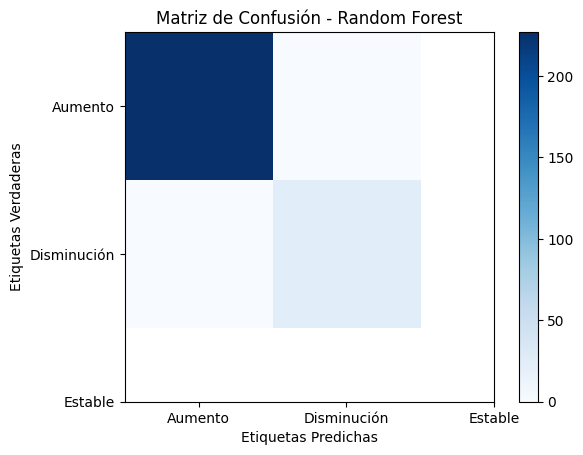

In [305]:
# Matriz de Confusión para el modelo Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.imshow(confusion_matrix_rf, cmap=plt.cm.Blues, interpolation='nearest')
plt.title('Matriz de Confusión - Random Forest')
plt.colorbar()
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.xticks([0, 1, 2], ['Aumento', 'Disminución', 'Estable'])
plt.yticks([0, 1, 2], ['Aumento', 'Disminución', 'Estable'])
plt.show()


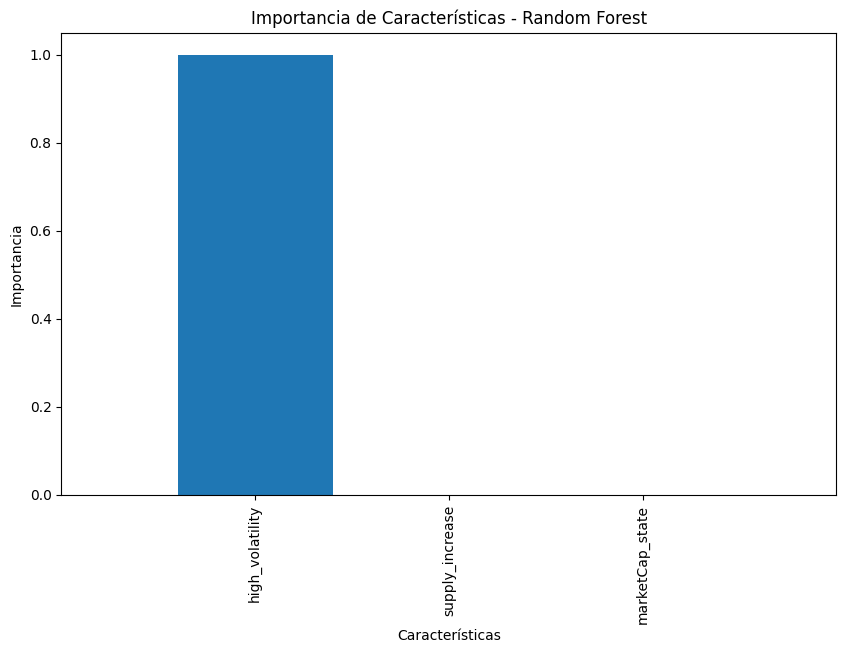

In [306]:
# Obtener la importancia de las características del modelo Random Forest
importances = rf_model.feature_importances_

# Obtener nombres de las características
feature_names = X.columns

# Ordenar las importancias de las características en orden descendente
indices = np.argsort(importances)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()


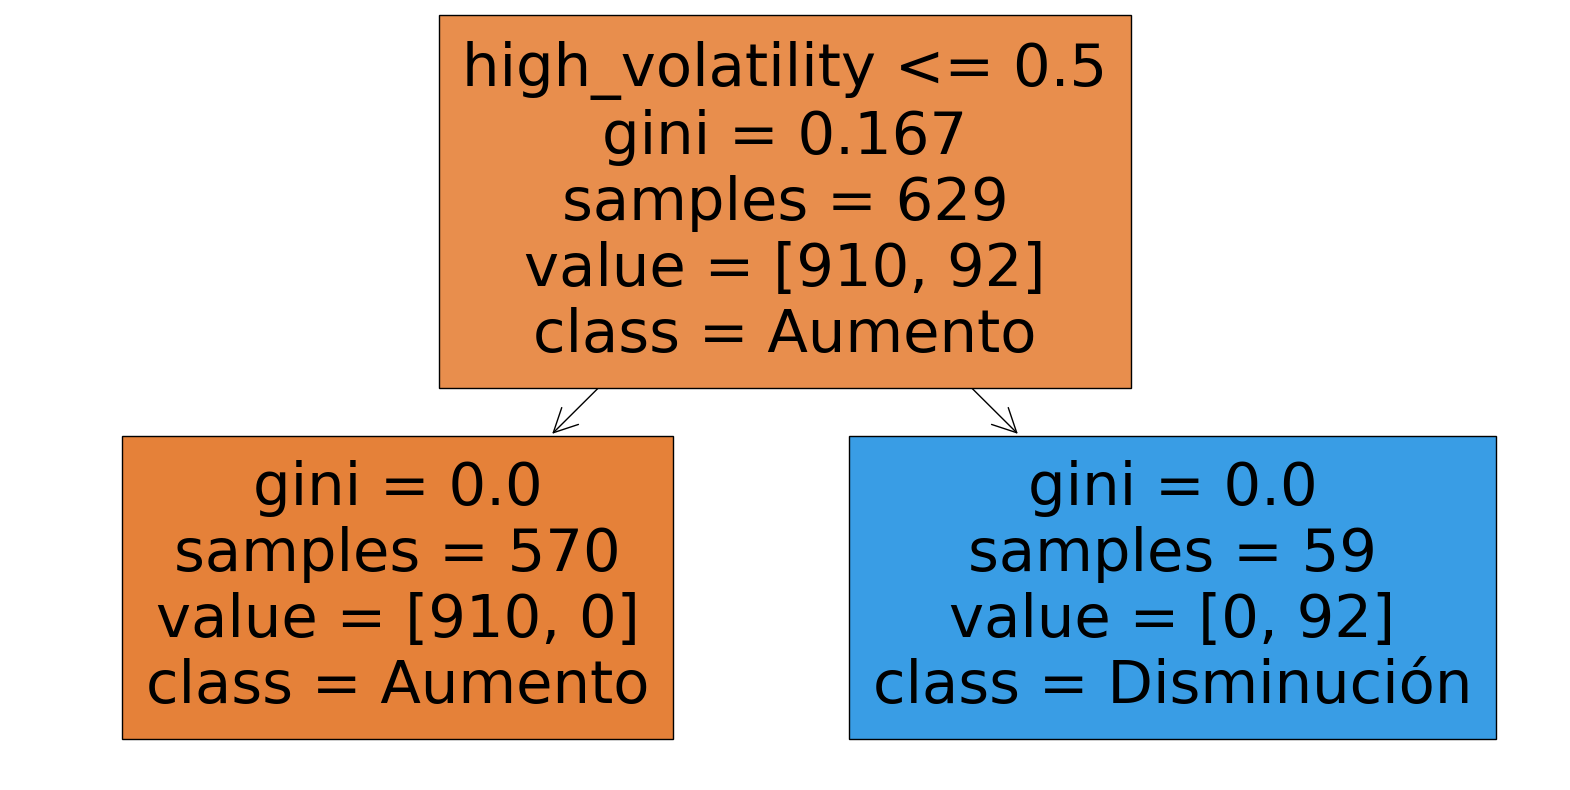

In [307]:
from sklearn.tree import plot_tree

# Obtener un árbol de decisión del modelo Random Forest (o Gradient Boosting)
tree = rf_model.estimators_[0]  # Cambia 0 por el índice del árbol a visualizar

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Aumento', 'Disminución', 'Estable'], filled=True)
plt.show()
